# BMI565: Bioinformatics Programming & Scripting

#### (C) Michael Mooney (mooneymi@ohsu.edu)

## Week 8: Data Visualization With Matplotlib & Seaborn

** * Thanks to Ben Cordier for the materials on plotting with Seaborn.**

#### Table of Contents

1. [Introduction](#Introduction)
    * Dependencies
    * Installation
    * Setup
2. [Plotting With Matplotlib](#Plotting-With-Matplotlib)
    * Basic Plotting
    * Advanced Plot Structuring
    * Other Plot Types
    * Combining Multiple Plots
3. [Plotting With Seaborn](#Plotting-With-Seaborn)
    * Basic Plots
    * Advanced Plots
4. [In-Class Exercises](#In-Class-Exercises)
5. [Reference](#Reference)


### Introduction

#### Dependencies

The following dependencies are required to run this notebook. Note that the version numbers are primarily for reference; exact library versions are unlikely to be required.

1. Python
    * Python 2.7 or 3.x
2. Python Libraries
    * Jupyter 1.0.0
    * Pandas 0.20.3
    * Numpy 1.13.1
    * Scipy 0.18.0
    * Matplotlib 2.0.2
    * Seaborn 0.8.1
3. Data
    * <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)" target="_blank">UCI Machine Learning Repository Data</a>
    * `./data/wdbc.csv`
    
#### Installation
If you don't have the above libraries installed, use `conda` to install the packages, or run the following commands in your terminal:
```bash
pip3 install jupyter==1.0.0    # Jupyter Notebook
pip3 install numpy==1.13.1     # Numpy
pip3 install scipy==0.19.1     # Scipy
pip3 install matplotlib==2.0.2 # Matplotlib
pip3 install seaborn==0.8.1    # Seaborn
```
*Use `pip` instead of `pip3` if using Python 2.7*

#### Setup
If you only have Python 2.7 installed, you should be able to run this notebook with the Python 2.7 kernel as well. 

In [1]:
# The following line is only needed inside the Jupyter notebook to render plots inline, it is not a Python statement
%matplotlib inline

# Imports: Standard Library
import re as Rgx
import math as Math
import os as OS
import random as Random

# Imports: Third Party
import pandas as Pandas
import numpy as np
import scipy as Scipy
import matplotlib as Mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting with `matplotlib`

- Matplotlib is strongly influenced by Matlab
- A large variety of visualizations are possible
    - [http://matplotlib.sourceforge.net/gallery.html](http://matplotlib.sourceforge.net/gallery.html)
- Numeric data is converted to numpy arrays for efficient processing and visualization

**Visualization is essential for bioinformatics** – particularly when analyzing high-throughput datasets. 
Analyses and visualizations need to be reproducible and (often) automated.

<img src="images/heat_map.jpg" align="left" width="600" />

#### Basic Plotting

##### <span style="color: gray">A Simple Plot</span>

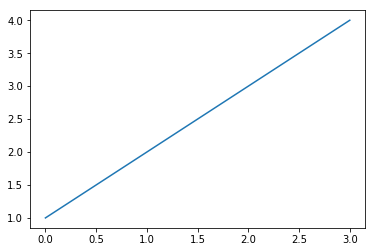

In [2]:
# Use the plt.plot() function for simple plot creation
# Give a single list (or array), and the x axis 
# will be filled with [0, 1, 2, ...]
plt.plot([1,2,3,4]);

##### <span style="color: gray">Saving A Plot</span>

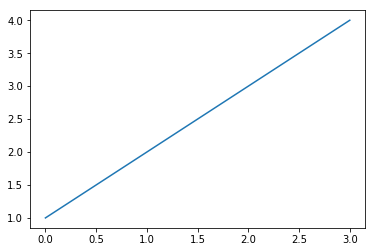

In [3]:
# Use plt.savefig() to save a plot to an image file
fig = plt.figure()
plt.plot([1,2,3,4])
fig.savefig('new_plot.png', format='png')

##### <span style="color: gray">Plotting Multiple Data Columns</span>

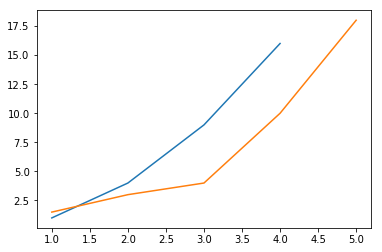

In [4]:
# Plot multiple datasets
fig = plt.figure()
plt.plot([1,2,3,4], [1,4,9,16]) 
plt.plot([1,2,3,4,5], [1.5,3,4,10,18]);

##### <span style="color: gray">Modifying Axes</span>

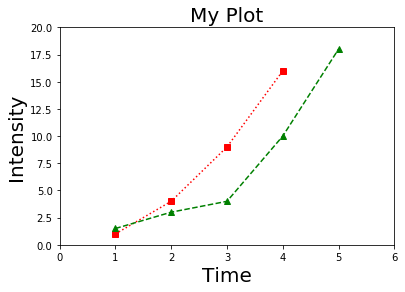

In [5]:
# Change appearance of axes
fig = plt.figure()
plt.title("My Plot", fontsize=20)              # Title
plt.xlabel("Time", fontsize=20)                # X Axis Label
plt.ylabel("Intensity", fontsize=20)           # Y Axis Label
plt.ylim(0,20)                                 # Y Axis Range
plt.xlim(0,6)                                  # X Axis Domain
# Plot multiple data sets
plt.plot([1,2,3,4], [1,4,9,16], ":sr")         # Square Markers - Red
plt.plot([1,2,3,4,5], [1.5,3,4,10,18], "--^g"); # Dash Markers - Green

##### <span style="color: gray">Customizing and Configuring Matplotlib</span>

A quick way to customize a plot is to use any of the styles built-in to `Matplotlib`.

In [6]:
# You can see available plotting styles
print(plt.style.available)

['seaborn-darkgrid', 'Solarize_Light2', 'seaborn-notebook', 'classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'fast', 'seaborn-pastel', 'seaborn-dark', 'tableau-colorblind10', 'seaborn', 'seaborn-dark-palette']


We can then use a style like so:

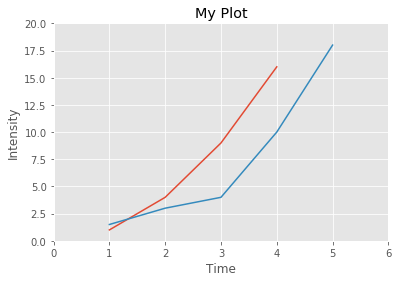

In [7]:
# Let's Use The Classic GGplot style
plt.style.use("ggplot")

# Same Plot As Before Without Customized Axes / Markers
fig = plt.figure()
plt.title("My Plot")    
plt.xlabel("Time") 
plt.ylabel("Intensity") 
plt.ylim(0,20)
plt.xlim(0,6)
plt.plot([1,2,3,4], [1,4,9,16]) 
plt.plot([1,2,3,4,5], [1.5,3,4,10,18]);

You can also customize `matplotlib` by modifying the `matplotlib` configuration file's text or modifying the configuration file's properties directly in Python.

In [8]:
# To locate the configuration file
Mpl.matplotlib_fname()

'/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

And to modify parameters directly, we can set them within the Python environment. 

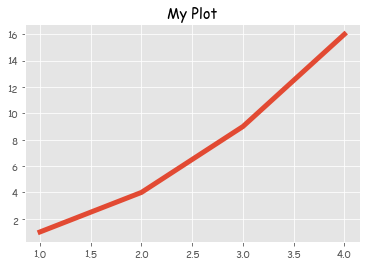

In [9]:
Mpl.rcParams["lines.linewidth"] = 5      # Set Line Width to 5 Pixels
Mpl.rcParams["font.family"] = "fantasy"  # Set Font Family to Fantasy
plt.title("My Plot")
plt.plot([1,2,3,4], [1,4,9,16]);

The documentation also provides [an example configuration file](http://matplotlib.sourceforge.net/users/customizing.html#a-sample-matplotlibrc-file) that lists some of the keys values that can be modified. 

#### Advanced Plot Structuring

##### <span style="color: gray">Creating a Legend</span>

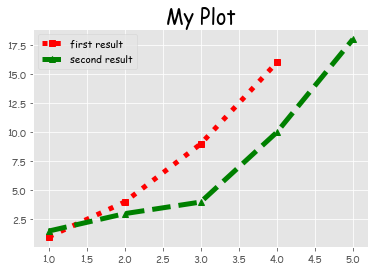

In [10]:
# Create a legend for the plot
plt.title("My Plot", fontsize=20)
plt.plot([1,2,3,4], [1,4,9,16], ":sr")
plt.plot([1,2,3,4,5], [1.5,3,4,10,18], "--g^")
plt.legend(["first result", "second result"], loc=0);

##### <span style="color: gray">Customizing a Legend</span>

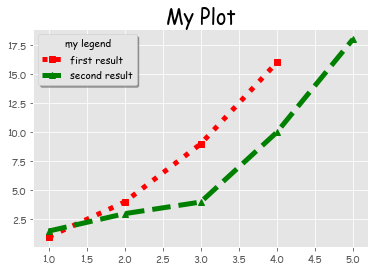

In [11]:
# Customize the legend
plt.title("My Plot", fontsize=20)
plt.plot([1,2,3,4], [1,4,9,16], ":sr")
plt.plot([1,2,3,4,5], [1.5,3,4,10,18], "--^g")
plt.legend(["first result", "second result"], loc=0, fancybox=True, shadow=True, title="my legend");

##### <span style="color: gray">Annotating a Plot</span>

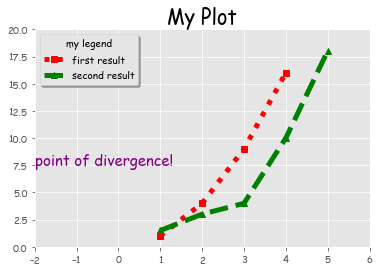

In [12]:
# Annotate the plot
plt.title("My Plot", fontsize=20)
plt.ylim(0,20)
plt.xlim(-2,6)
plt.plot([1,2,3,4], [1,4,9,16], ":sr")
plt.plot([1,2,3,4,5], [1.5,3,4,10,18], "--^g")
plt.annotate("point of divergence!", xy=(-2,7.5), fontsize=15, color="purple")
plt.legend(["first result", "second result"], loc=0, fancybox=True, shadow=True, title="my legend");

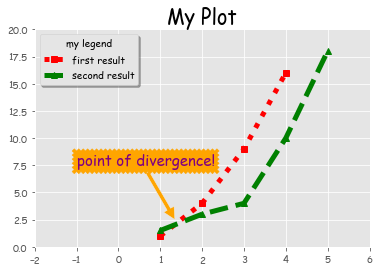

In [13]:
# Annotate the plot
plt.title("My Plot", fontsize=20)
plt.ylim(0,20)
plt.xlim(-2,6)
plt.plot([1,2,3,4], [1,4,9,16], ":sr")
plt.plot([1,2,3,4,5], [1.5,3,4,10,18], "--g^")
plt.annotate("point of divergence!", xytext=(-1,7.5), fontsize=15, color="purple", arrowprops={"facecolor":"orange"}, xy=(1.35,2.5), bbox=dict(boxstyle="sawtooth", color="orange"))
plt.legend(["first result", "second result"], loc=0, fancybox=True, shadow=True, title="my legend");

#### Other Plot Types

##### <span style="color: gray">Histograms</span>

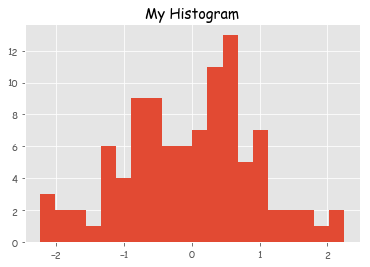

In [14]:
# Histogram
data = np.random.randn(100)
plt.title("My Histogram")
plt.hist(data, bins=20);

##### <span style="color: gray">Bar Charts</span>

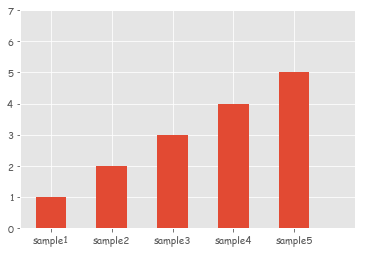

In [15]:
# Bar plot
width = 0.5
locations = np.arange(1,6)
plt.bar(locations, np.array([1,2,3,4,5]), width=width)
plt.xlim(.5,6)
plt.ylim(0,7)
ticks1 = plt.xticks(locations, ["sample1", "sample2", "sample3", "sample4", "sample5"])

##### <span style="color: gray">Pie Charts</span>

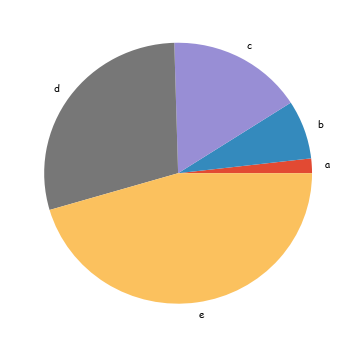

In [16]:
# Pie chart
fig = plt.figure(figsize = (6,6))
data1 = np.array([1,2,3,4,5])**2
labs = ["a","b","c","d","e"]
pie1 = plt.pie(data1,labels=labs)

##### <span style="color: gray">Box Plots</span>

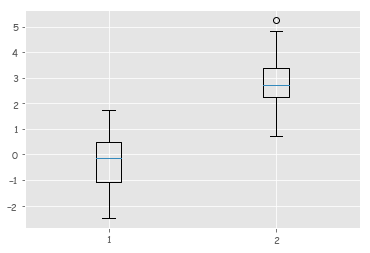

In [17]:
# Box plot
Mpl.rcParams["lines.linewidth"] = 2
x1 = np.random.normal(0,1,30)
x2 = np.random.normal(3,1,50)
box1 = plt.boxplot([x1,x2])

##### <span style="color: gray">Violin Plots</span>

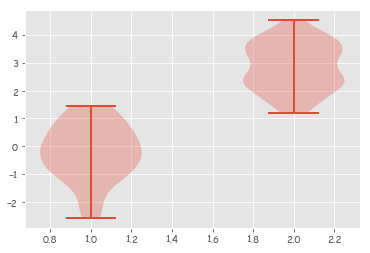

In [18]:
# Violin plot
Mpl.rcParams["lines.linewidth"] = 2
x1 = np.random.normal(0,1,30)
x2 = np.random.normal(3,1,50)
box1 = plt.violinplot([x1,x2])

#### Combining Multiple Plots

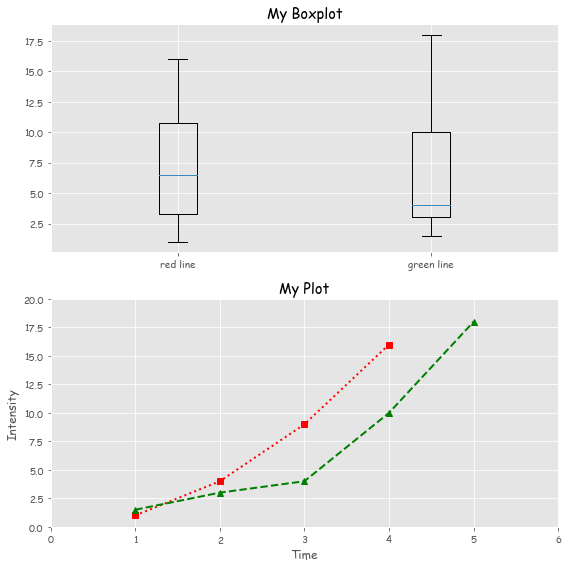

In [19]:
# Combining multiple plots using subplots
# Subplot takes 3 arguments: rows, columns, plot number
fig = plt.figure(1, figsize = (8,8))
# First subplot - Boxplots
plt.subplot(2, 1, 1)
plt.boxplot([[1,4,9,16], [1.5,3,4,10,18]], labels = ["red line", "green line"])
plt.title("My Boxplot")

# Second subplot - Lines
plt.subplot(2, 1, 2)
plt.plot([1,2,3,4],[1,4,9,16], ":rs")
plt.title("My Plot")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.ylim(0,20)
plt.xlim(0,6)
plt.plot([1,2,3,4,5],[1.5,3,4,10,18],"--g^")
fig.tight_layout() # improves spacing between subplots

## Plotting With Seaborn

Seaborn is a Python library built on top of Matplotlib that allows for the simple creation of complex visualizations for statistical analysis. 

#### Basic Plots

##### <span style="color: gray">Plotting Distributions</span>

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


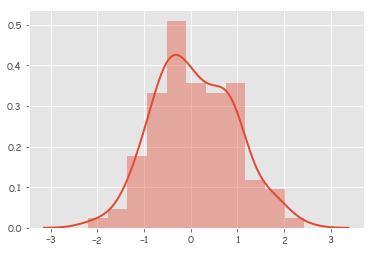

In [20]:
# Generate Random Data Following a Normal Distribution With Numpy
normal = np.random.normal(size=200)
sns.distplot(normal);

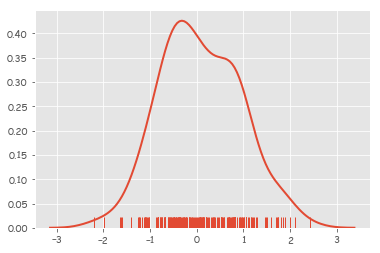

In [21]:
# With a Rug Plot Instead of a Histogram
sns.distplot(normal, hist=False, rug=True);

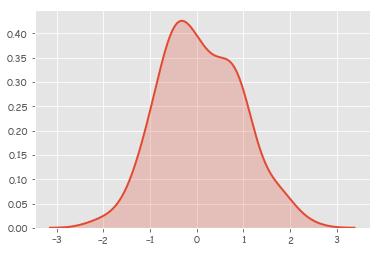

In [22]:
# Kernel Density Estimation
sns.kdeplot(normal, shade = True);

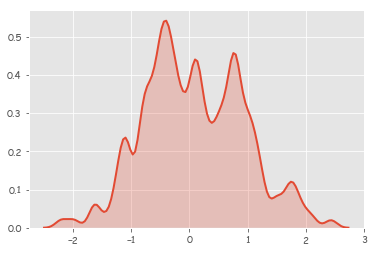

In [23]:
# Controlling The Tightness of The KDE Fit
sns.kdeplot(normal, shade = True, bw = 0.1) # Set Bandwidth to 0.1

##### <span style="color: gray">Check Distribution Fit</span>
You can also check distribution fit. See the [Scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) for available distribution functions.

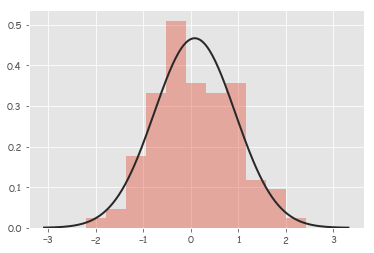

In [24]:
# You Can Also Check Against A Distribution 
from scipy import stats
sns.distplot(normal, kde = False, fit = stats.norm)

The `stats.norm` value for the `fit` parameter of `Seaborn.dist.plot` returns a reference to the `norm` class, which inherits from the `rv_continuous` class (a generic class for a continuous random variable). This allows Seaborn to fit a standard normal distribution, using the `fit` method belonging to `rv_continuous`, to the data. The `fit` method returns the shape (where applicable), location, and scale parameters of the distribution; in the case of a normal distribution, the location is the mean and the scale is the standard deviation. To read more about the `stats.norm` class, see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

#### Advanced Plots

##### <span style="color: gray">Plotting Bivariate Distributions</span>

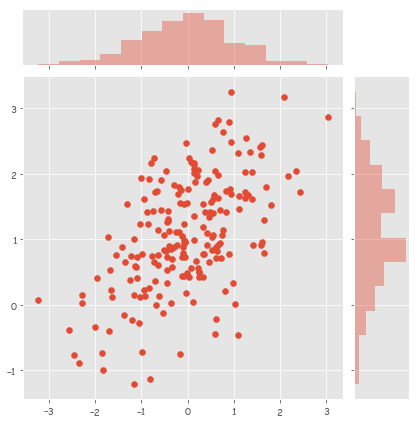

In [25]:
# Set Distribution Means & Covariance Matrix
mean, cov = [0, 1], [(1, .5), (.5, .75)]
# Generate Random Multivariate Data Following the Normal Distribution
multivariate = np.random.multivariate_normal(mean, cov, 200)
# Plot All Rows From Column 0 By All Rows From Column 1
sns.jointplot(multivariate[:,0], multivariate[:,1])

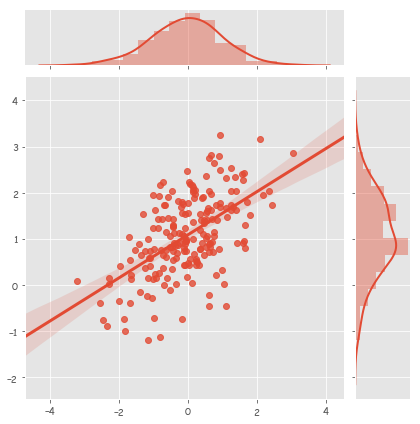

In [26]:
# With a Regression Line
sns.jointplot(multivariate[:,0], multivariate[:,1], kind="reg")

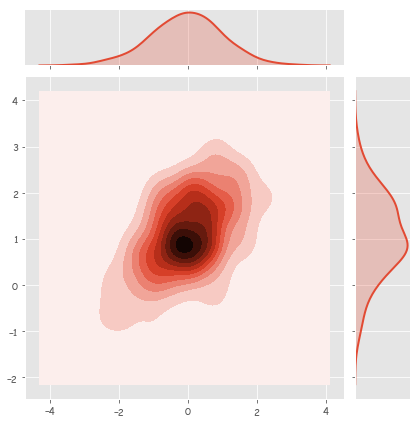

In [27]:
# With Kernel Density Estimation
sns.jointplot(multivariate[:,0], multivariate[:,1], kind="kde")

##### <span style="color: gray">Plotting Pairwise Relationships</span>
As seen in the second joint plot above, we can also create simple regression plots. By default, Seaborn will first model the relationship between the two variables input using the least squares method of linear regression, then plot the line of best fit along with a 95% confidence interval. You can also specify the polynomial order for the line of best fit. See the the documentation for [Seaborn.regplot](http://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) to see other parameters and how to do other types of regression analysis, such as logistic regression. 

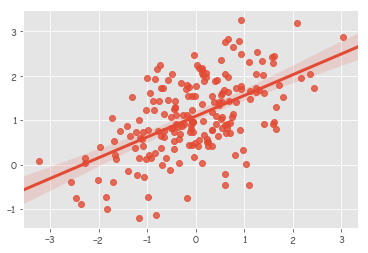

In [28]:
# A Simple Regression Plot
sns.regplot(multivariate[:,0], multivariate[:,1], order = 1)

For checking whether a regression fulfills the assumption of homoscedasticity, we can use a residuals plot. The purpose of this type of plot is to confirm there are no systematic error between the dependent and independent varaiables in the model or, put another way, that errors are more or less randomly distributed. For a more detailed explanation of the residuals plot and its relation to regression analysis, see [this resource](http://stattrek.com/regression/residual-analysis.aspx)

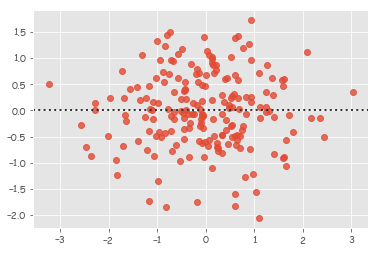

In [29]:
# A Residuals Plot
# For Checking Whether Regression Is Appropriate; Ideally Points Should Be Randomly Plotted Around 0 On The Y-Axis
sns.residplot(multivariate[:,0], multivariate[:,1]);

Seaborn is heavily integrated with the Pandas library as well, allowing for the simple passing of dataframes to plotting functions. For example, we can use a `pairplot` to plot the pairwise relationships between columns in a dataframe. 

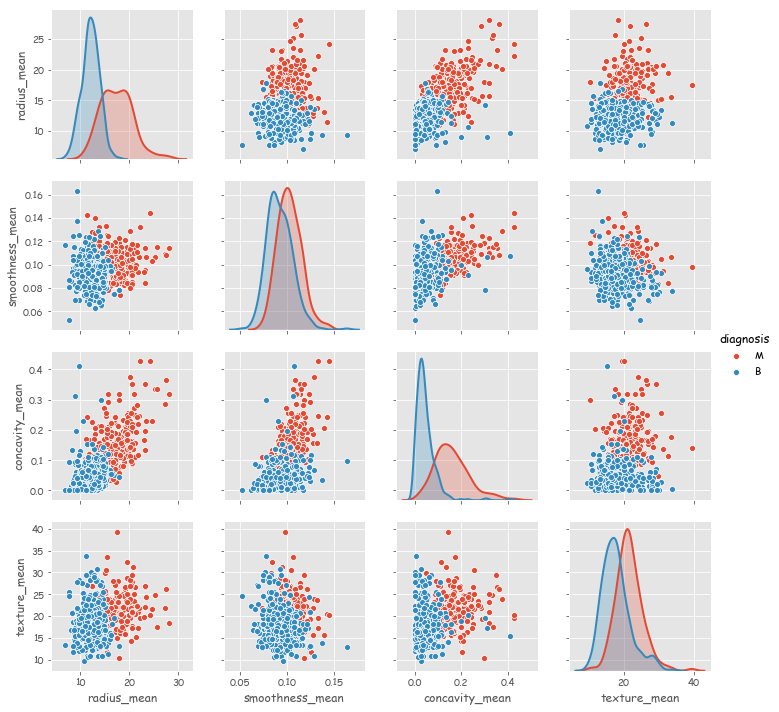

In [30]:
# Automatic Plotting of Pairwise Relationships
metastatic_or_benign = Pandas.read_csv(OS.getcwd() + "/data/wdbc.csv").drop(["Unnamed: 32"], axis = 1)
cols = metastatic_or_benign[["diagnosis", "radius_mean", "smoothness_mean", "concavity_mean", "texture_mean"]]
sns.pairplot(cols, hue = "diagnosis");

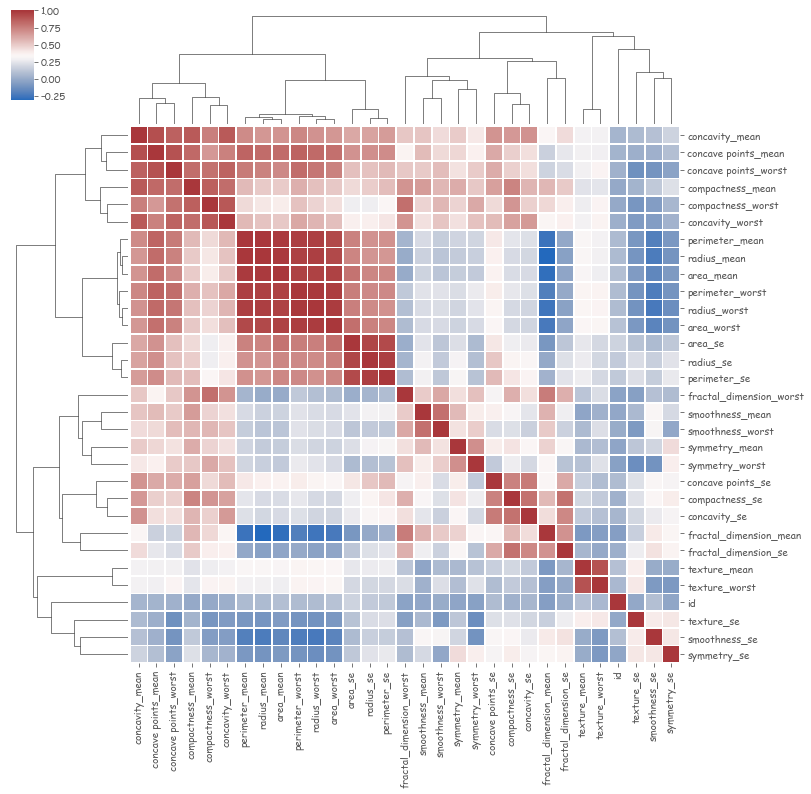

In [31]:
# Get Correlation Matrix
correlation_matrix = metastatic_or_benign.corr()
# Draw Heatmap of Correlation Matrix
sns.clustermap(correlation_matrix, cmap="vlag", linewidths=.75, figsize=(12, 12))

## In-Class Exercises

In [32]:
# Exercise 1 – Given the following data:
x = [1,2,3,4]
y = [1,4,9,16]

# Plot x vs. y

# Create a boxplot of y

# Combine the two plots into a single figure


In [33]:
# Exercise 2 – Given the following randomly generated Pandas DataFrame:
x = [1,2,3,4]
y = [1,4,9,16]
data = Pandas.DataFrame({
    "class": list([Math.floor((float(x) / 50) + Random.random()) for x in range(50)]) + list([Math.ceil((float(x) / 50) - Random.random()) for x in range(50)]),
    "x": [Math.floor(x + (Random.random() * 2)) for x in range(100)],
    "y": [Math.floor(x + (Random.random() * 2)) * x for x in range(100)],
    "z": [Math.ceil(x + (Random.random() * 2)) * -x for x in range(100)]
})

# Plot a shaded kernel density estimation plot for z

# Plot the joint distribution of X and Y with a regression line and second order polynomial

# Create a pairplot of the dataframe with the hue parameter set to the class variable


## References

- Python for Bioinformatics, Sebastian Bassi, CRC Press (2010)
- [http://matplotlib.org/contents.html](http://matplotlib.org/contents.html)
- [http://seaborn.pydata.org](http://seaborn.pydata.org)

#### Last Updated: 8-Oct-2018¶